# Cold Spells - IFS
---

Here we will focus on:
- [`2t`](https://codes.ecmwf.int/grib/param-db/167) 2 metre temperature,
- [`mn2t3`](https://codes.ecmwf.int/grib/param-db/228027) minimum temperature at 2 metres in the last 3 hours, and
- [`10fgg10`](https://codes.ecmwf.int/grib/param-db/131100) 10 metre wind gust of at least 10 m/s in Argentina on 29 June at 00 UTC.

:::{tip}
If you have not visited the [Cold Spells - AIFS](./cold-spells-aifs.ipynb) website yet, we highly recommend you to do so before proceeding further with the analysis.
:::

## 1. Set Up Your Environment and Find ECMWF Open Data
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata

In [1]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import earthkit.plots as ekp
import earthkit

(content:references:listParam_csi)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.
- Parameters available on a single level:

In [5]:
PARAM_SFC = ["mn2t3", "2t"]
LEVELTYPE = "sfc"

DATES = [20250629, 20250630, 20250701]
TIME = 0
STEPS = 6
STREAM = "oper"
TYPE = "fc"
MODEL = "ifs"

### Get the data using the ECMWF Open Data API

In [3]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. 2-metre temperature and minimum temperature at 2 metres in the last 3 hours

In [6]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select data from 29 June 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mn2t3,heightAboveGround,2,20250629,0,3-6,fc,None,regular_ll
1,ecmf,2t,heightAboveGround,2,20250629,0,6,fc,None,regular_ll


:::{attention}
Some units of our data can be converted using `units` option, however, this is not possible for all the parameters in the GRIB file. 
:::

In [7]:
t2m = ds.sel(shortName="2t")
t2m.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250629,0,6,fc,None,regular_ll


In [12]:
t2min_K = ds.sel(shortName="mn2t3")

md_t2min = t2min_K.metadata()
ds_t2min = t2min_K.values - 273.15
t2min = ekd.FieldList.from_array(ds_t2min, md_t2min)
t2min.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,mn2t3,heightAboveGround,2,20250629,0,3-6,fc,None,regular_ll


## 3. 10 metre wind gust of at least 10 m/s
The input values can be set [here](#content:references:listParam_csi).

In [20]:
PARAM_SFC = ["10fgg10"]
LEVELTYPE = "sfc"

DATES = [20250629, 20250630, 20250701]
TIME = 0
STEPS = "0-24"
STREAM = "enfo"
TYPE = "ep"
MODEL = "ifs"

The `dump()` method inspects all the namespace keys of a parameter.
:::{important}
One has to use the bracket operator to fetch the GribField from the GRIBReader and inspect its metadata.
:::

In [28]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select data from 29 June 2025
wg10 = ekd.from_source("file", list_of_files[0])[0]
wg10.dump()

ECCODES WARNING :  Key scaleValuesBy is applicable only during encoding.        
ECCODES WARNING :  Key offsetValuesBy is applicable only during encoding.


globalDomain,g
GRIBEditionNumber,2
tablesVersionLatestOfficial,34
tablesVersionLatest,34
grib2divider,1000000
angleSubdivisions,1000000
missingValue,9999
ieeeFloats,1
isHindcast,0
section0Length,16
identifier,GRIB


## 4. Data visualisation

The plots below show analyses of 2 metre temperature and minimum temperature at 2 metres in the last 3 hours on 29 June at 00 UTC.

<Figure size 900x600 with 0 Axes>

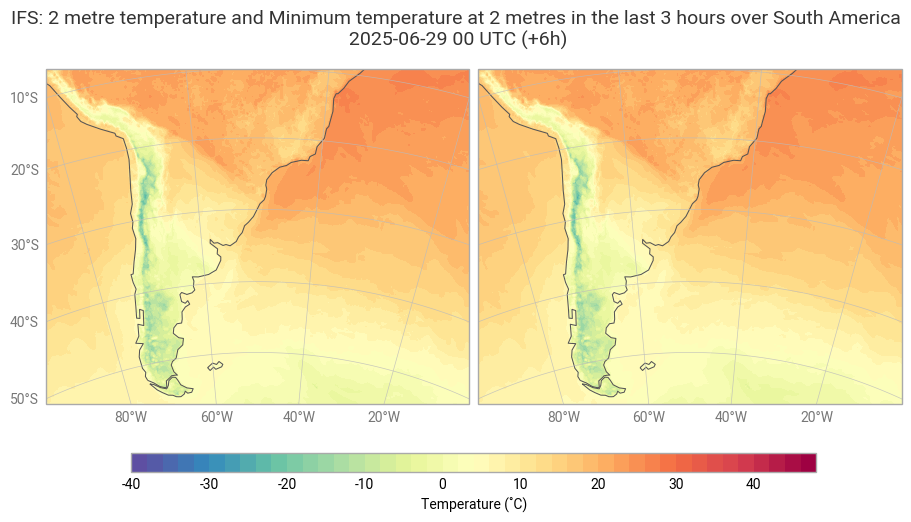

In [17]:
figure = ekp.Figure(domain=[-80, -20, -55, -10], size=(9, 6), rows=1, columns=2)

t2m_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
    units="celsius",
)

t2min_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(-40, 50, 2),
)

figure.contourf(t2m, style=t2m_shade)
subplot = figure.add_map(0, 1)
subplot.contourf(t2min, style=t2min_shade)

figure.title("IFS: {variable_name} over South America\n {base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n")

figure.coastlines(resolution="low")
figure.gridlines()

figure.legend(location="bottom", label="Temperature (˚C)")

figure.save(fname=f"./plots/{''.join(PARAM_SFC)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
figure.show()

The plot below shows analysis of 10 metre wind gust of at least 10 m/s on 29 June 2025.

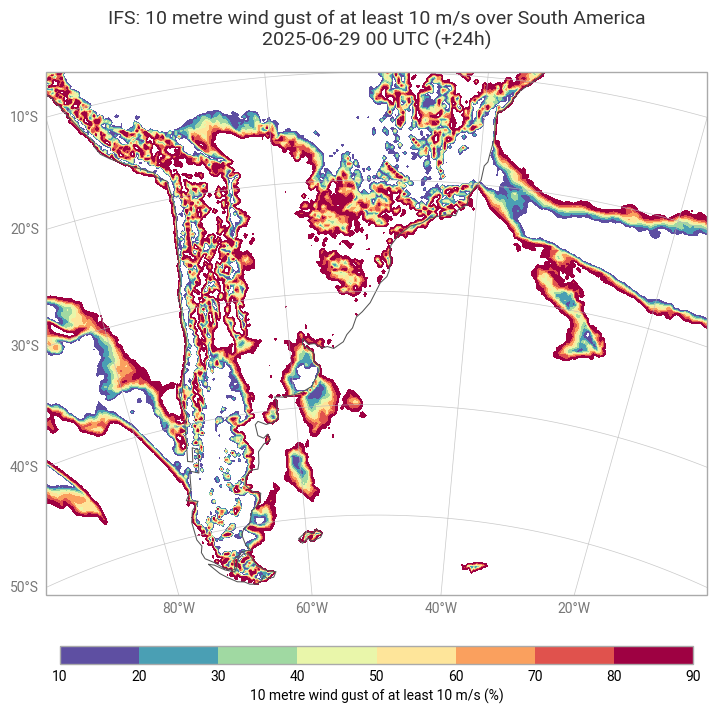

In [33]:
chart = ekp.Map(domain=[-80, -20, -55, -10])

wg10_shade = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(10, 100, 10),
    transform_first=True,
)

chart.contourf(wg10, style=wg10_shade)

chart.coastlines(resolution="low")
chart.gridlines()

chart.legend(location="bottom", label="{variable_name} (%)")

chart.title(
    "IFS: {variable_name} over South America\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{''.join(PARAM_SFC)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()